<center> <h1>Unstructured Serverless API Tutorial</h1>

## 1. Install the unstructured-client package

In [2]:
!pip install unstructured-client

   ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
   ---------------------------------------- 43.8/43.8 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/80.8 kB ? eta -:--:--
   ---------------------------------------- 80.8/80.8 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/49.2 kB ? eta -:--:--
   ---------------------------------------- 49.2/49.2 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/295.8 kB ? eta -:--:--
   --------- ------------------------------ 71.7/295.8 kB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/295.8 kB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/295.8 kB 1.7 MB/s eta 0:00:01
   ------------------ ------------------- 143.4/295.8 kB 774.0 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/295.8 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 295.8/295.8 kB 1.0 MB/s eta 0:00:00
   -----

## 2. Get your free API key

- Get your Unstructured Serverless API key for a free 14 day trial period with **1000 pages/day** here: https://unstructured.io/api-key-hosted  

- Get a free API key with **1000 pages/month** here: https://unstructured.io/api-key-free

## 3. Send a request to to the Unstructured client

### 3.1 Client Setup and document preparation

In [6]:
import unstructured_client
from unstructured_client.models import operations, shared

filepath = "attention.pdf"


client = unstructured_client.UnstructuredClient(
    api_key_auth="XXXXXXXXXXXXXXXXXXXXXXX",
    server_url="https://api.unstructuredapp.io",
)

with open(filepath, "rb") as f:
    files = shared.Files(
        content=f.read(),
        file_name=filepath
    )

### 3.2 Basic request

Official API documentation : https://docs.unstructured.io/api-reference/api-services/overview

In [54]:
req = operations.PartitionRequest(
    partition_parameters = shared.PartitionParameters(files=files),
)

res = client.general.partition(request=req)
element_dicts = [element for element in res.elements]

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 15 (15 total)
INFO: Determined optimal split size of 3 pages.
INFO: Partitioning 5 files with 3 page(s) each.
INFO: Partitioning set #1 (pages 1-3).
INFO: Partitioning set #2 (pages 4-6).
INFO: Partitioning set #3 (pages 7-9).
INFO: Partitioning set #4 (pages 10-12).
INFO: Partitioning set #5 (pages 13-15).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final resu

In [55]:
element_dicts[0]

{'type': 'NarrativeText',
 'element_id': '4a974158cb854977acfdda190531a4ec',
 'text': 'Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 1,
  'filename': 'attention.pdf'}}

In [56]:
types = set([e["type"] for e in element_dicts])
types

{'Footer',
 'Formula',
 'Header',
 'Image',
 'NarrativeText',
 'PageNumber',
 'Table',
 'Title',
 'UncategorizedText'}

In [58]:
images = [e for e in element_dicts if e["type"] == "Image"]
images[0]

{'type': 'Image',
 'element_id': 'bdda825a3df68b0a76b880e1b15e8184',
 'text': 'Output Probabilities Multi-Head Feed Attention Forward } ) Nx L Nx Masked Multi-Head Multi-Head Attention Attention 4t __t Positional Positional Encoding Q @ Q ‘« Encoding Inputs Outputs (shifted right)',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 3,
  'filename': 'attention.pdf'}}

In [62]:
narrative_texts = [e for e in element_dicts if e["type"] == "NarrativeText"]
narrative_texts[10]

{'type': 'NarrativeText',
 'element_id': '4e4ee79e8696e88df049fa65f1c69d15',
 'text': 'Recurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has achieved significant improvements in computational efficiency through factorization tricks [21] and conditional computation [32], while also improving model performance in case of the latter. The fundamental constraint of sequential computation, however, remains.',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 2,
  'parent_id': '011f819c274e60ceb879776151038159',
  'filename': '

### 3.3 Layout-aware chunking

Official chunking documentation : https://docs.unstructured.io/api-reference/api-services/chunking#basic-chunking-strategy

In [14]:
req = operations.PartitionRequest(
    partition_parameters = shared.PartitionParameters(
        files=files,
        chunking_strategy="by_title",
        max_characters=1500,
    )
)

res = client.general.partition(request=req)
element_dicts = [element for element in res.elements]

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 15 (15 total)
INFO: Determined optimal split size of 3 pages.
INFO: Partitioning 5 files with 3 page(s) each.
INFO: Partitioning set #1 (pages 1-3).
INFO: Partitioning set #2 (pages 4-6).
INFO: Partitioning set #3 (pages 7-9).
INFO: Partitioning set #4 (pages 10-12).
INFO: Partitioning set #5 (pages 13-15).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final resu

In [16]:
for i, e in enumerate(element_dicts[:20]):
    print(f"Chunk N°{i+1} : {e["text"]}\n\n")

Chunk N°1 : Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

Attention Is All You Need

3 2 0 2 g u A 2 ] L C . s c [ 7 v 2 6 7 3 0 . 6 0 7 1 : v i X r a

Ashish Vaswani∗ Google Brain avaswani@google.com

Llion Jones∗ Google Research llion@google.com

Noam Shazeer∗ Google Brain noam@google.com

Niki Parmar∗ Google Research nikip@google.com

Jakob Uszkoreit∗ Google Research usz@google.com

Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu

Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com

Illia Polosukhin∗ ‡ illia.polosukhin@gmail.com


Chunk N°2 : Abstract

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Trans

### 3.4 Image & table extraction

In [11]:
!pip install -q pillow matplotlib --upgrade

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.1/2.6 MB 1.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.6 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.6 MB 1.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.6 MB 1.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.6 MB 692.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.6 MB 692.4 kB/s eta 0:00:04
   ----- ---------------------------------- 0.3/2.6 MB 846.5 kB/s eta 0:00:03
   ------- -------------------------------- 0.5/2.6 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.6 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.6/2.6 MB 1.0 MB/s eta 0:00:02
   -------- --------

In [17]:
req = operations.PartitionRequest(
    shared.PartitionParameters(
        files=files,
        strategy="hi_res",
        extract_image_block_types=["Image", "Table"]
    )
)

res = client.general.partition(request=req)
element_dicts = [element for element in res.elements]

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 15 (15 total)
INFO: Determined optimal split size of 3 pages.
INFO: Partitioning 5 files with 3 page(s) each.
INFO: Partitioning set #1 (pages 1-3).
INFO: Partitioning set #2 (pages 4-6).
INFO: Partitioning set #3 (pages 7-9).
INFO: Partitioning set #4 (pages 10-12).
INFO: Partitioning set #5 (pages 13-15).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Successfully partitioned set #1, elements added to the final result.
INFO: Successfully partitioned set #2, elements added to the final resu

In [18]:
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
images = [el for el in element_dicts if el["type"] == "Image"]

In [20]:
images[0]

{'type': 'Image',
 'element_id': 'bdda825a3df68b0a76b880e1b15e8184',
 'text': 'Output Probabilities Multi-Head Feed Attention Forward } ) Nx L Nx Masked Multi-Head Multi-Head Attention Attention 4t __t Positional Positional Encoding Q @ Q ‘« Encoding Inputs Outputs (shifted right)',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 3,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAOQAncDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx

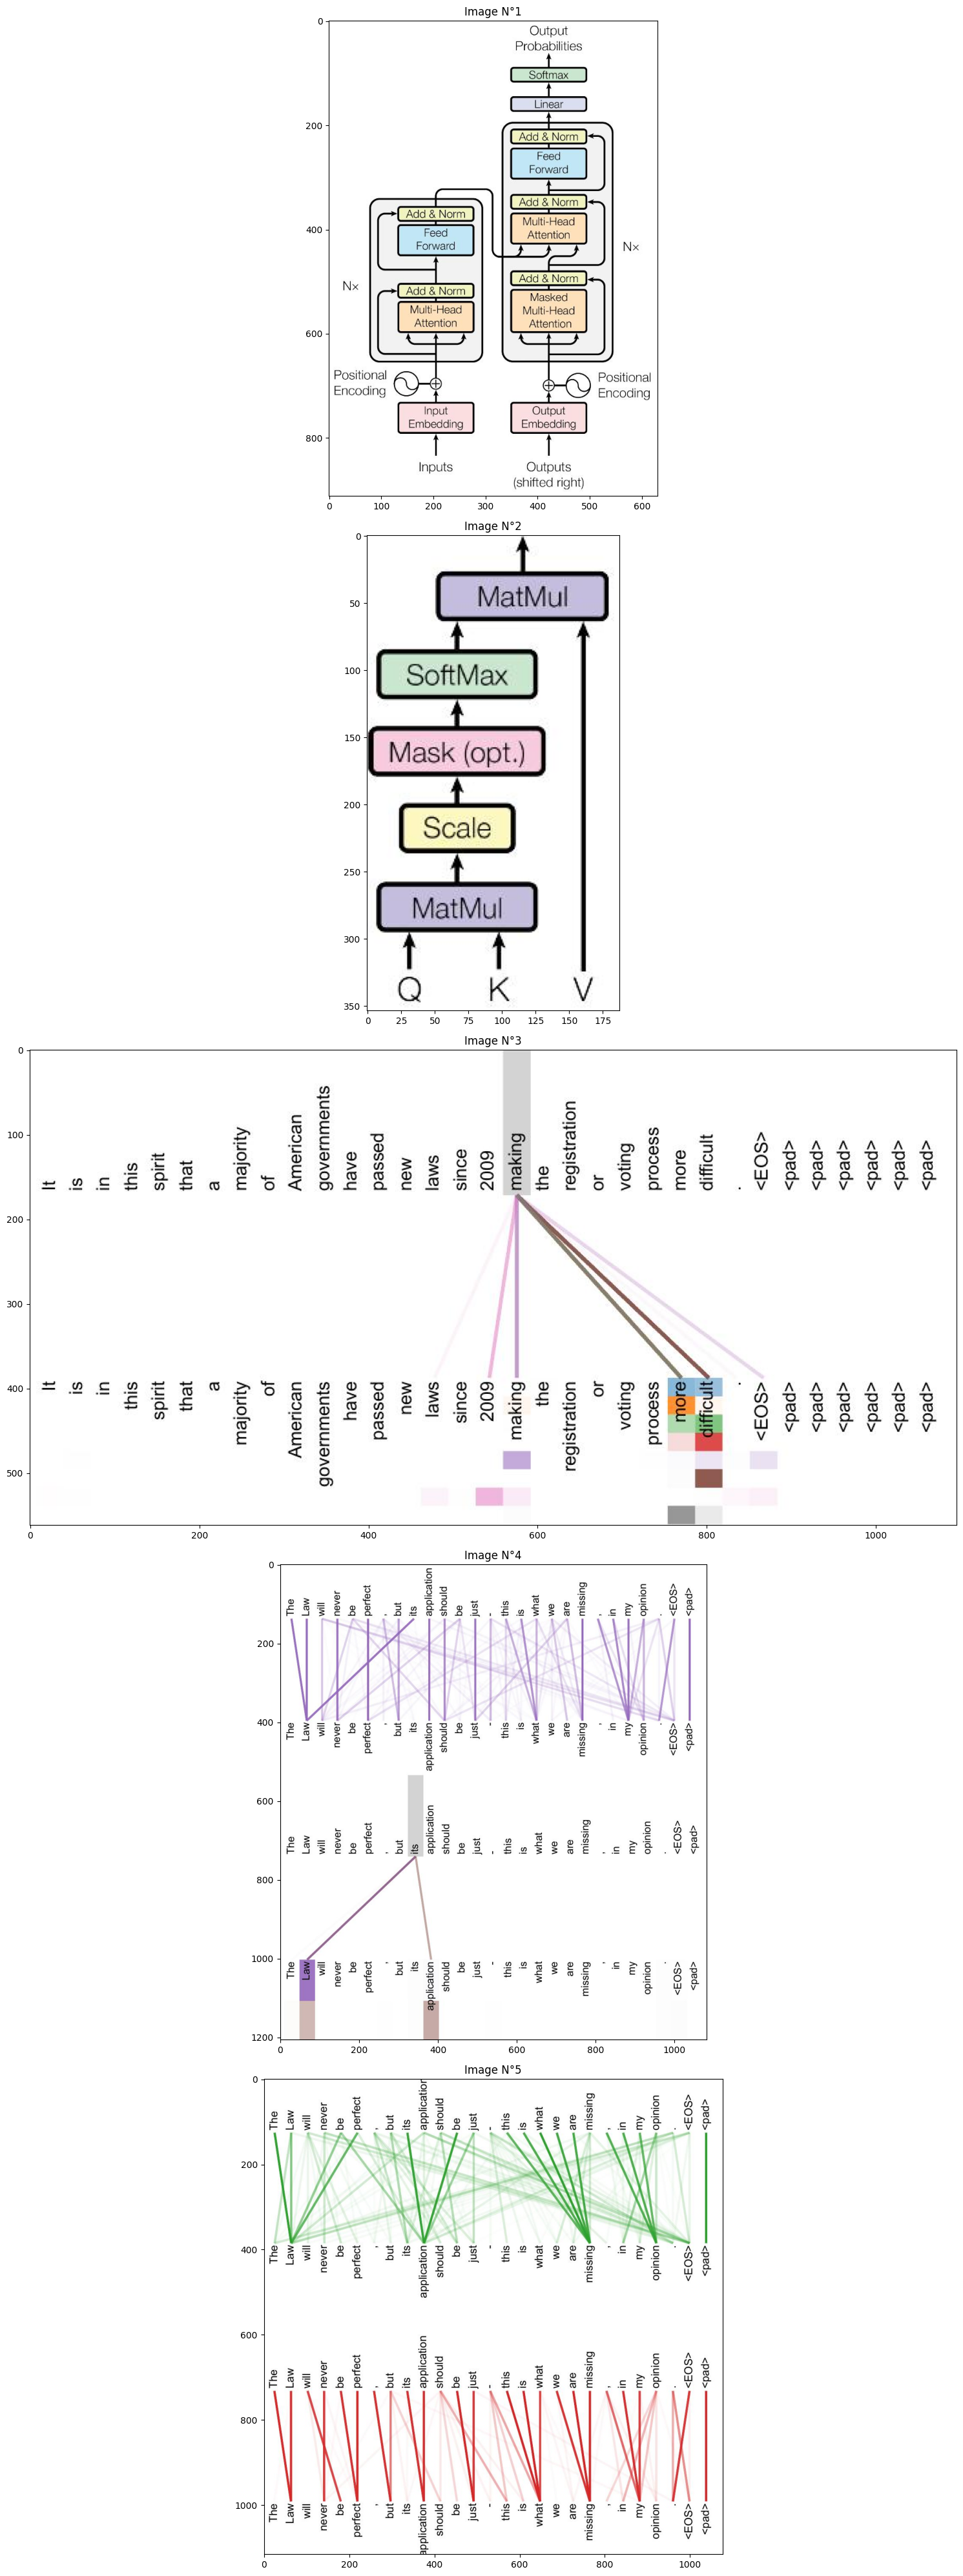

In [21]:
fig, axs = plt.subplots(len(images), 1, figsize=(40, 40))

for i, image in enumerate(images):
    decoded_string = io.BytesIO(base64.b64decode(image["metadata"]["image_base64"]))
    img = Image.open(decoded_string)
    axs[i].imshow(img)
    axs[i].set_title(f'Image N°{i+1}')

plt.tight_layout()
plt.show()

In [22]:
tables = [el for el in element_dicts if el["type"] == "Table"]
tables[0]

{'type': 'Table',
 'element_id': '175f344781c69d08cd609543649f21f4',
 'text': 'Layer Type Self-Attention Recurrent Convolutional Self-Attention (restricted) Complexity per Layer O(n2 · d) O(n · d2) O(k · n · d2) O(r · n · d) Sequential Maximum Path Length Operations O(1) O(n) O(1) O(1) O(1) O(n) O(logk(n)) O(n/r)',
 'metadata': {'text_as_html': '<table><thead><tr><th>Layer Type</th><th>Complexity per Layer</th><th>Sequential Operations</th><th>Maximum Path Length</th></tr></thead><tbody><tr><td>Self-Attention</td><td>O(n?-d)</td><td>(1)</td><td>(1)</td></tr><tr><td>Recurrent</td><td>O(n-d?)</td><td></td><td>O(n)</td></tr><tr><td>Convolutional</td><td>O(k-n-d?)</td><td>) %</td><td>O(logk(n))</td></tr><tr><td>Self-Attention (restricted)</td><td>O(r-n-d</td><td>1)</td><td>O(n/r)</td></tr></tbody></table>',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 6,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsI

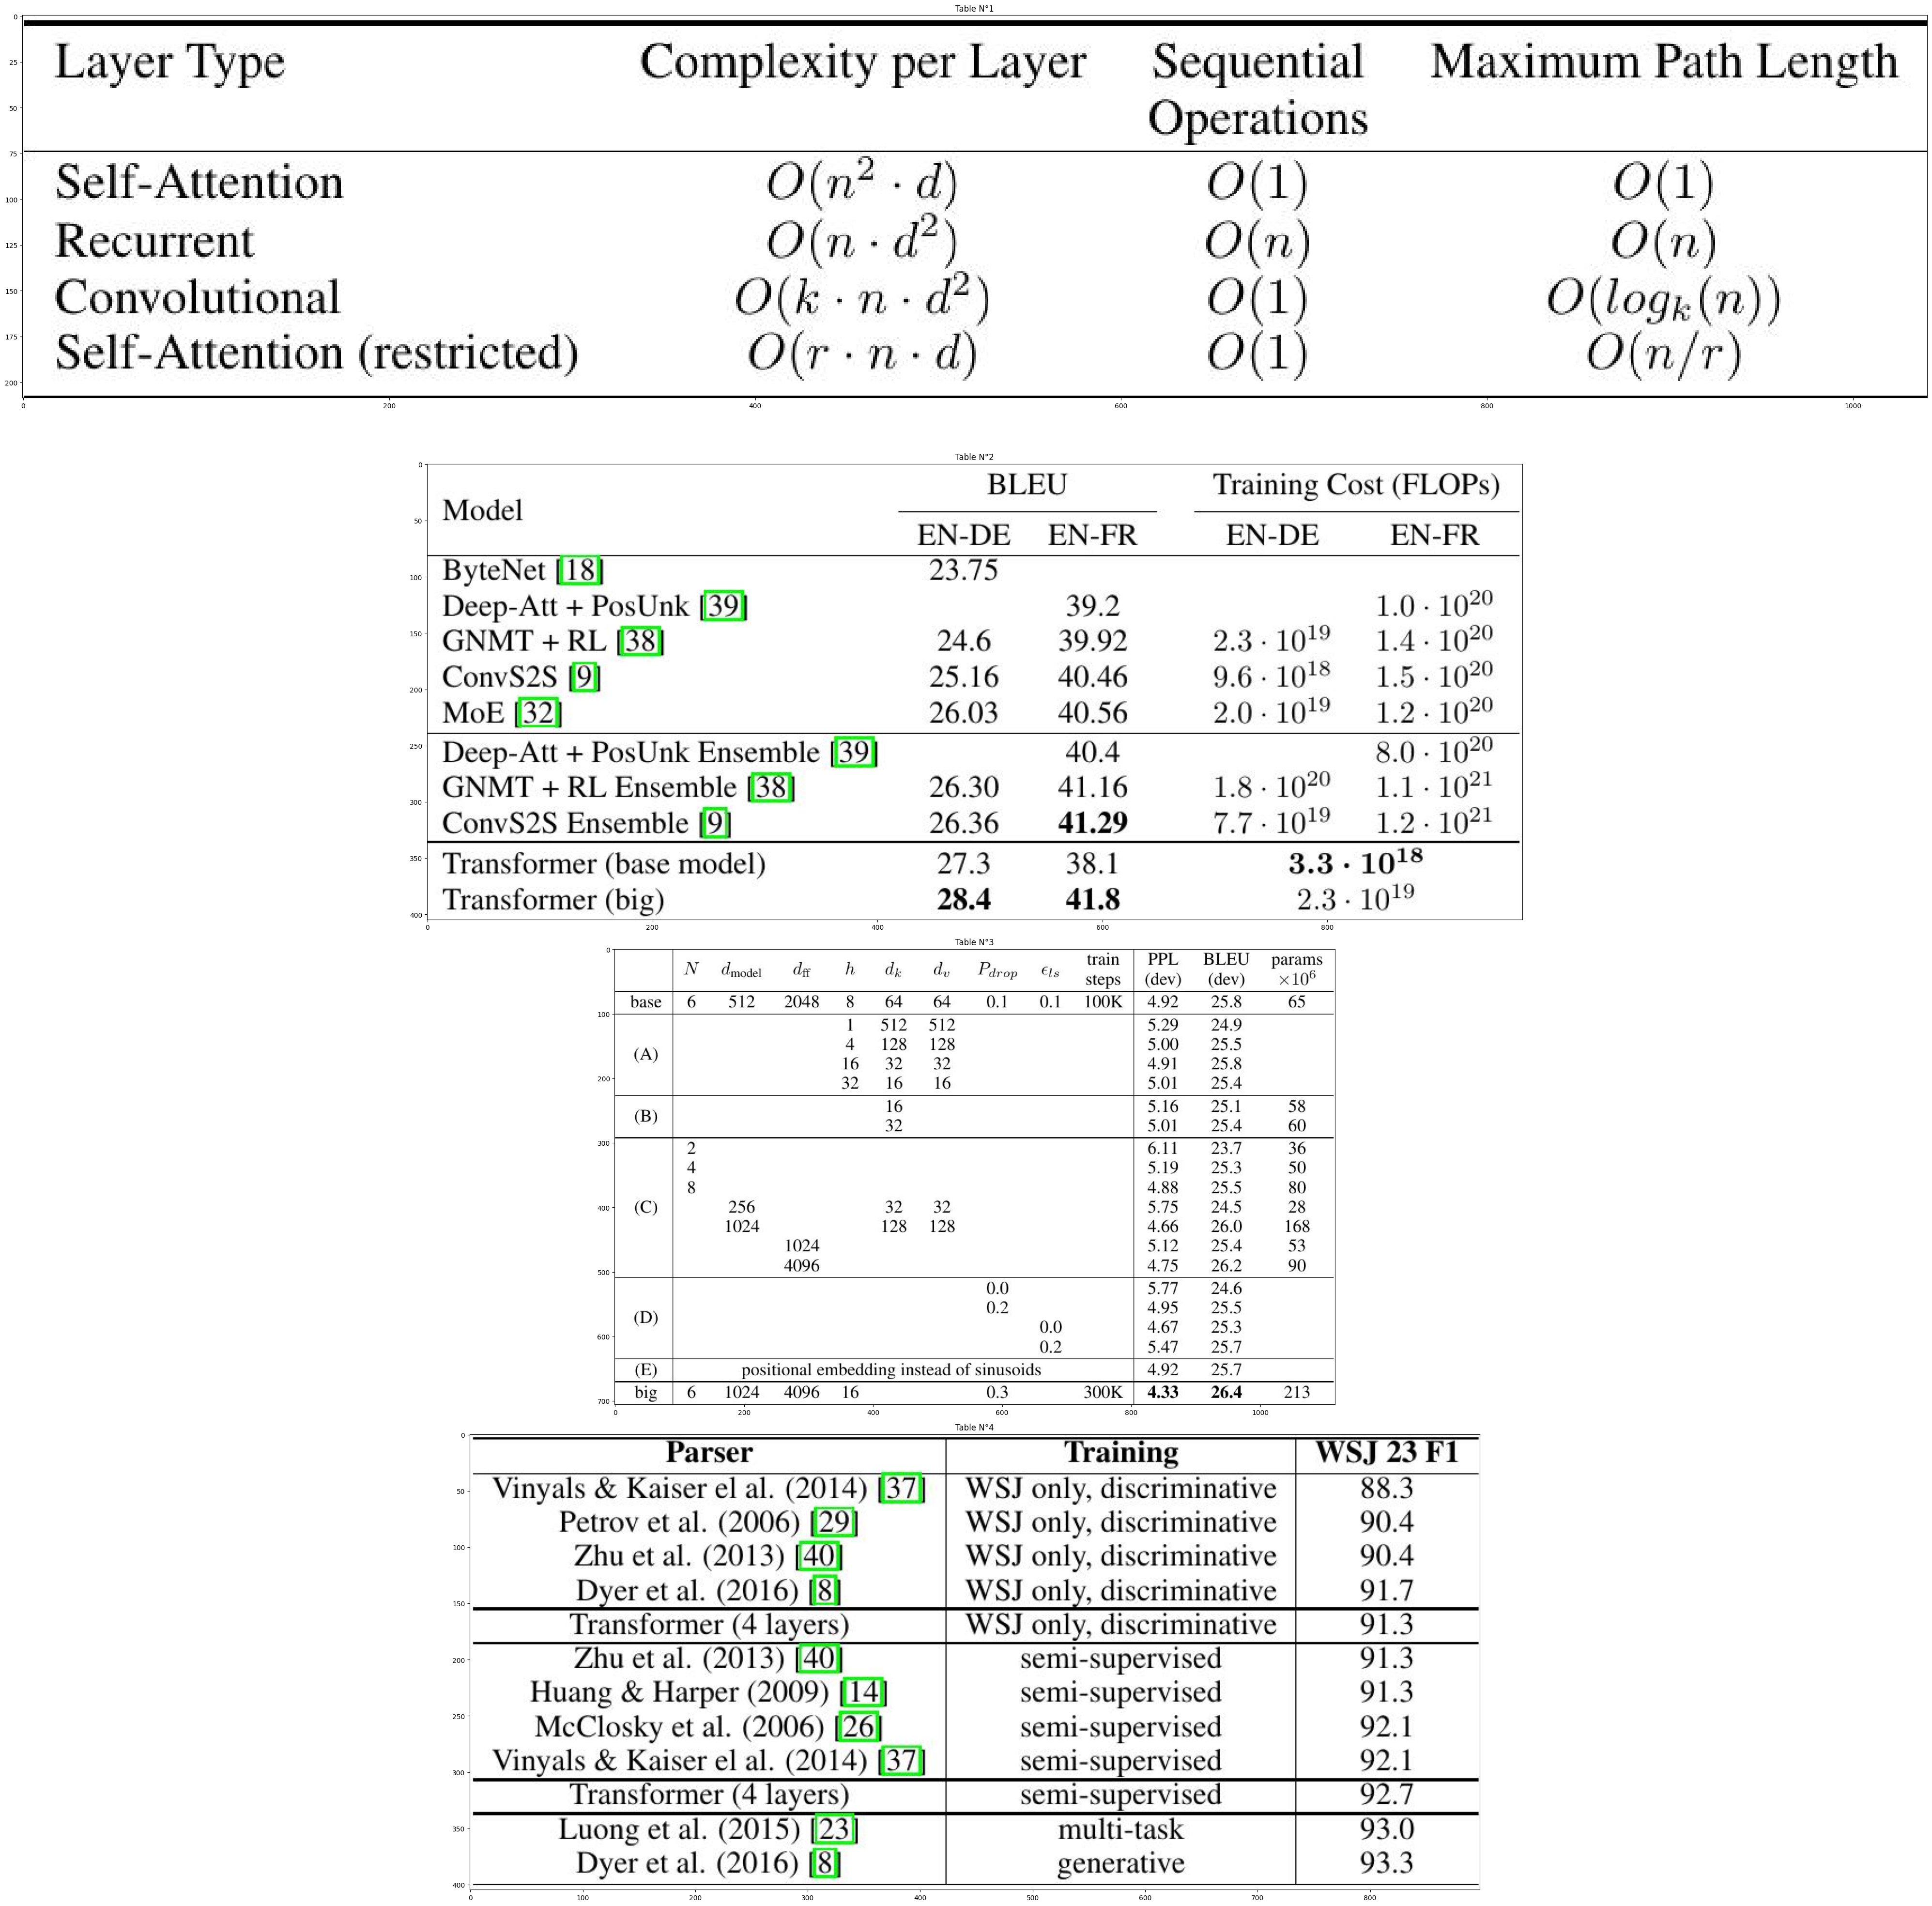

In [23]:
fig, axs = plt.subplots(len(tables), 1, figsize=(40, 40))

for i, table in enumerate(tables):
    decoded_string = io.BytesIO(base64.b64decode(table["metadata"]["image_base64"]))
    img = Image.open(decoded_string)
    axs[i].imshow(img)
    axs[i].set_title(f'Table N°{i+1}')

plt.tight_layout()
plt.show()